In [40]:
from estimark.scf import scf_data_full
from estimark.parameters import age_mapping
from estimark.estimation import get_weighted_moments
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW

In [41]:
scf_data_full

,age,age_group,wealth_income_ratio,weight,wave
30,31,"(30,35]",6.697993,3676.299028,1995
31,31,"(30,35]",6.697993,3822.532451,1995
32,31,"(30,35]",6.697993,3779.582462,1995
33,31,"(30,35]",6.697993,3570.089875,1995
34,31,"(30,35]",6.697993,3803.353076,1995
...,...,...,...,...,...
232510,43,"(40,45]",9.602461,6283.187315,2019
232511,43,"(40,45]",11.444635,6639.658020,2019
232512,43,"(40,45]",11.547022,6580.343722,2019
232513,43,"(40,45]",10.413175,6515.081945,2019


In [42]:
moments = get_weighted_moments(
    data=scf_data_full,
    variable="wealth_income_ratio",
    weights="weight",
    groups="age_group",
    mapping=age_mapping,
)

In [43]:
moments

{'(25,30]': array([0.65763249]),
 '(30,35]': array([0.97360885]),
 '(35,40]': array([1.78172387]),
 '(40,45]': array([2.38910063]),
 '(45,50]': array([3.23681528]),
 '(50,55]': array([4.24488131]),
 '(55,60]': array([5.32876747]),
 '(60,65]': array([6.45894082]),
 '(65,70]': array([7.92872889]),
 '(70,75]': array([8.80298421]),
 '(75,80]': array([9.85313601]),
 '(80,85]': array([8.75530344]),
 '(85,90]': array([11.36179422]),
 '(90,95]': array([9.9756071])}

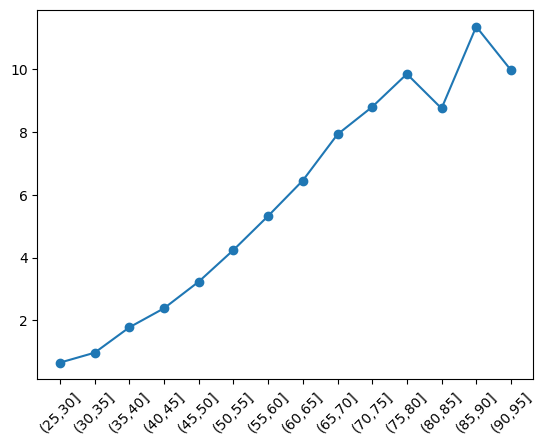

In [44]:
plt.plot(moments.values())
plt.scatter(range(len(moments)), moments.values())
plt.xticks(range(len(moments)), moments.keys(), rotation=45)
plt.show()

In [45]:
from estimark.snp import snp_data

In [46]:
snp_data

,age,share,age_group
51,71,0.393936,"(70,75]"
52,72,0.382074,"(70,75]"
53,73,0.370212,"(70,75]"
54,74,0.363326,"(70,75]"
55,75,0.356440,"(70,75]"
56,76,0.349554,"(75,80]"
57,77,0.342668,"(75,80]"
58,78,0.335781,"(75,80]"
59,79,0.332880,"(75,80]"
60,80,0.329979,"(75,80]"


In [47]:
share_moments = get_weighted_moments(
    data=snp_data,
    variable="share",
    groups="age_group",
    mapping=age_mapping,
    weights=None,
)

In [48]:
share_moments

{'(70,75]': 0.37021211462000003,
 '(75,80]': 0.33578140508,
 '(80,85]': 0.32127446132,
 '(85,90]': 0.32127446132,
 '(90,95]': 0.32127446132}

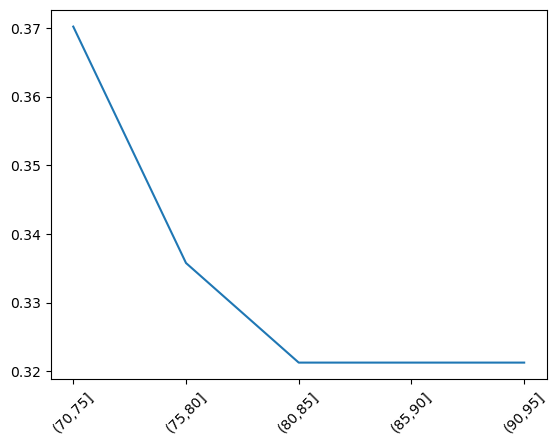

In [49]:
plt.plot(share_moments.values())
plt.xticks(range(len(share_moments)), share_moments.keys(), rotation=45)
plt.show()

In [56]:
def weighted_median(data, var, weights):
    dsw = DescrStatsW(data[var], weights=data[weights])
    return dsw.quantile(0.5, return_pandas=False)[0]


temp = (
    scf_data_full.groupby(["age_group", "wave"])
    .apply(weighted_median, var="wealth_income_ratio", weights="weight")
    .reset_index()
)

temp

/tmp/ipykernel_763100/3227000379.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = scf_data_full.groupby(["age_group", "wave"]).apply(weighted_median, var="wealth_income_ratio", weights="weight").reset_index()


,age_group,wave,0
0,"(25,30]",1995,0.829978
1,"(25,30]",1998,0.463712
2,"(25,30]",2001,0.992973
3,"(25,30]",2004,0.759365
4,"(25,30]",2007,0.753445
...,...,...,...
121,"(90,95]",2007,8.989320
122,"(90,95]",2010,13.095266
123,"(90,95]",2013,2.550180
124,"(90,95]",2016,15.249137
